### PART 2

https://github.com/markusmkim/GA-MDVRP/blob/master/src/MDVRP/CrowdedDepot.java
    

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt 
import random

In [46]:
#utils
def Sqr(a):
    return a*a
 
def Distance(x1,y1,x2,y2):
    return sqrt(Sqr(y2-y1)+Sqr(x2-x1))

In [47]:
fileToOpen = "p01.txt"

m = 0
n = 0
t = 0

In [48]:
ct = 0
with open(fileToOpen) as fin:
    rows = (line.split() for line in fin)
    for row in rows:
        if ct == 0:
            m = int(row[0])
            n = int(row[1])
            t = int(row[2])
            tmp = np.zeros([int(t),2])
            depotz = np.zeros([t, 5])
            customerz = np.zeros([n,5])
        elif ct > 0 and ct <= t:
            for depot in tmp:
                tmp[ct-1] = (row[0],row[1])
        elif ct >= t+1 and ct <= n+t:
            for element in range(n):
                a = n+t+1
                customerz[ct-a] = (row[0],row[1],row[2],row[3],row[4])
        elif ct > t+n:
            a = n+t+1
            for element in range(t):
                mdr = tmp[element][0]
                mlv = tmp[element][1]
                depotz[ct-a] = (row[0],row[1],row[2],mdr,mlv)
        ct = ct + 1
                
    
print (str(m) +" "+ str(n) +" "+ str(t) )

4 50 4


In [49]:
print(depotz)
print(customerz)

[[51. 20. 20.  0. 80.]
 [52. 30. 40.  0. 80.]
 [53. 50. 30.  0. 80.]
 [54. 60. 50.  0. 80.]]
[[ 1. 37. 52.  0.  7.]
 [ 2. 49. 49.  0. 30.]
 [ 3. 52. 64.  0. 16.]
 [ 4. 20. 26.  0.  9.]
 [ 5. 40. 30.  0. 21.]
 [ 6. 21. 47.  0. 15.]
 [ 7. 17. 63.  0. 19.]
 [ 8. 31. 62.  0. 23.]
 [ 9. 52. 33.  0. 11.]
 [10. 51. 21.  0.  5.]
 [11. 42. 41.  0. 19.]
 [12. 31. 32.  0. 29.]
 [13.  5. 25.  0. 23.]
 [14. 12. 42.  0. 21.]
 [15. 36. 16.  0. 10.]
 [16. 52. 41.  0. 15.]
 [17. 27. 23.  0.  3.]
 [18. 17. 33.  0. 41.]
 [19. 13. 13.  0.  9.]
 [20. 57. 58.  0. 28.]
 [21. 62. 42.  0.  8.]
 [22. 42. 57.  0.  8.]
 [23. 16. 57.  0. 16.]
 [24.  8. 52.  0. 10.]
 [25.  7. 38.  0. 28.]
 [26. 27. 68.  0.  7.]
 [27. 30. 48.  0. 15.]
 [28. 43. 67.  0. 14.]
 [29. 58. 48.  0.  6.]
 [30. 58. 27.  0. 19.]
 [31. 37. 69.  0. 11.]
 [32. 38. 46.  0. 12.]
 [33. 46. 10.  0. 23.]
 [34. 61. 33.  0. 26.]
 [35. 62. 63.  0. 17.]
 [36. 63. 69.  0.  6.]
 [37. 32. 22.  0.  9.]
 [38. 45. 35.  0. 15.]
 [39. 59. 15.  0. 14.]
 [40.  5. 

In [52]:
np.random.seed(0)


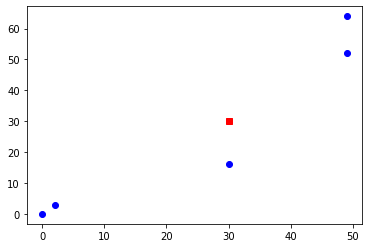

In [53]:
plt.plot(30,30, c='r', marker='s')
plt.scatter(customerz[1], customerz[2], c='b')

In [54]:
class Customer:
    def __init__(self,id,x,y,duration,demand):
        self.id = id
        self.x = x
        self.y = y 
        self.duration = duration
        self.demand = demand
        
            
    def __repr__(self):
        return str(self.id) +" "+ str(self.x) +" "+ str(self.y) + " " + str(self.duration) + " " + str(self.demand)

In [55]:
class Route:
    def __init__(self, ID, depot):
        self.id = ID
        self.depot = depot #depot assigned to this route
        self.customers = list() 
        self.capacity = 0 #total of the demand
        self.ttlDistance = 0 #Ttl distance of the road
        
    def addDemand(self, d):
        self.capacity = self.capacity + d

    def addCustomer(self,c):
        self.customers.append(c)
        #print(str(self.id)+ " " +str(self.customers) + str(len(self.customers)))
        
    #getting total distance/cost of the route
    def calculTotalDistance(self):
        #print("Route:" + str(self.id)+ " customers:" + str(len(self.customers)))
        ttl = 0
        vTotal = 0
        if len(self.customers) == 0:
            return 0
        first_cust = self.customers[0]
        last_cust = self.customers[-1]
        #print(first_cust)
        #print(last_cust)
        #calculating cost between each cust
        for c in range(len(self.customers)-1):
            #print("x: " +str(self.customers[c].x) +" y: " + str(self.customers[c].y))
            ttl = ttl + Distance(self.customers[c].x,self.customers[c].y,self.customers[c+1].x,self.customers[c+1].y)
            pass
        #and between depot at the begining and end of the route since the veh needs to stop where it started
        for d in depotz:
            #get the right depot
            if (d[0]-n)-1 == self.depot:
                addtt = 0
                addtt = addtt + Distance(first_cust.x, first_cust.y, d[1], d[2])
                addtt = addtt + Distance(last_cust.x, last_cust.y, d[1], d[2])
                vTotal = ttl + addtt
                #print("Distance bw cust: " + str(ttl) + " Added to beg and end: " + str(addtt)+ " Total: " + str(vTotal))
        self.ttlDistance = vTotal
        return vTotal
        
        
    def __repr__(self):
        return "Route: " +str(self.id) +" "+ str(self.depot) + " " + str(len(self.customers))+ " Sz:"+ str(len(self.customers)) + " C:" + str(self.capacity) + " T:" + str(self.ttlDistance)

In [84]:
vehiclesMxW = depotz[0][4]
nbVehicles = 16 #np.random.randint(t, m*t)  #aka number of routes
indivPerGen = 20


def createRoutes(routes):
    count = 0
    depot = 0
    for i in range(nbVehicles):
        if depot > t-1:
            depot = 0
            count = count + 1
        r = Route(i,depot)
        routes.append(r)
        depot = depot + 1
    
    """ct = 0
    depot = 0
    for i in range(nbVehicles):
        if ct > m-1:
            depot = depot + 1
            ct = 0
        r = Route(i,depot)
        routes.append(r)
        ct = ct + 1
    #print(str(routes))
        """
def assignRdRoute(routes, nbVehicles, randVeh=False):
    for el in customerz:
        #assign a random route to each cust
        routeChoisie = np.random.randint(0, nbVehicles)
        #assign a random depot to each cust
        #depotChoisie = np.random.randint(0, t)
        cust = Customer(el[0], el[1], el[2], el[3], el[4])
        #print(str(routeChoisie) + " " + str(depotChoisie ))
        
        for rt in range(len(routes)):
            if routes[rt].id == routeChoisie :
                #print( str(routes[rt].id)+ "=="+ str(routeChoisie))
                routes[rt].addCustomer(cust)
                routes[rt].addDemand(cust.demand)
            
#create a single solution (set of routes)        
def createSolution():
    routes = list()
    
    #list of routes created
    createRoutes(routes)
    #Assign random routes to each customers
    assignRdRoute(routes,nbVehicles)
    #calculate base distance on route
    #print("Calculating base distance:")
    listOfDistance = list()
    for rt in routes:
        listOfDistance.append(rt.calculTotalDistance())
    #print()
    #print(listOfDistance)
    #print(routes)
    return routes

In [85]:
createSolution()

[Route: 0 0 4 Sz:4 C:67.0 T:161.08758025557123,
 Route: 1 1 4 Sz:4 C:47.0 T:208.79884005473292,
 Route: 2 2 3 Sz:3 C:26.0 T:68.03812912668516,
 Route: 3 3 3 Sz:3 C:62.0 T:107.3403819725151,
 Route: 4 0 3 Sz:3 C:49.0 T:138.6478893362672,
 Route: 5 1 4 Sz:4 C:58.0 T:148.24626519288825,
 Route: 6 2 1 Sz:1 C:9.0 T:39.395431207184416,
 Route: 7 3 3 Sz:3 C:37.0 T:131.94492458118876,
 Route: 8 0 2 Sz:2 C:38.0 T:116.4875724546707,
 Route: 9 1 1 Sz:1 C:11.0 T:69.31089380465383,
 Route: 10 2 1 Sz:1 C:21.0 T:79.6994353806851,
 Route: 11 3 5 Sz:5 C:97.0 T:227.6157290095797,
 Route: 12 0 5 Sz:5 C:85.0 T:183.77330541003982,
 Route: 13 1 6 Sz:6 C:83.0 T:214.72390712996855,
 Route: 14 2 4 Sz:4 C:60.0 T:57.22474479292417,
 Route: 15 3 1 Sz:1 C:27.0 T:119.81652640600127]

In [86]:
def makeGeneration(nbSolutions=indivPerGen):
    solutions = list()
    for i in range(nbSolutions):
        solutions.append(createSolution())
    return solutions

In [87]:
makeGeneration()
print(makeGeneration()[0])

[Route: 0 0 3 Sz:3 C:43.0 T:146.92381720193026, Route: 1 1 3 Sz:3 C:53.0 T:77.0122665162617, Route: 2 2 4 Sz:4 C:39.0 T:229.80000863030168, Route: 3 3 6 Sz:6 C:82.0 T:191.48154955371334, Route: 4 0 4 Sz:4 C:93.0 T:143.06184399579743, Route: 5 1 4 Sz:4 C:64.0 T:118.78055167871337, Route: 6 2 3 Sz:3 C:42.0 T:138.17481214611806, Route: 7 3 4 Sz:4 C:54.0 T:168.82283845942868, Route: 8 0 3 Sz:3 C:48.0 T:162.78729700923304, Route: 9 1 1 Sz:1 C:15.0 T:16.0, Route: 10 2 3 Sz:3 C:47.0 T:207.3686932523032, Route: 11 3 2 Sz:2 C:22.0 T:118.97499175640672, Route: 12 0 1 Sz:1 C:30.0 T:82.02438661763951, Route: 13 1 2 Sz:2 C:32.0 T:99.9937656733609, Route: 14 2 2 Sz:2 C:29.0 T:70.52346004860408, Route: 15 3 5 Sz:5 C:84.0 T:211.28825271545296]


In [116]:
#Check if every chromosom is viable to make an individual 
#returns viable candidates and number of healthy individuals
def checkCaryotype(indiv):
    ttl = 0
    viables = list()
    for chromo in indiv:
        if chromo.capacity < vehiclesMxW:
            ttl = ttl + 1
            viables.append(chromo)
    return viables, ttl
#print("Viables: " + str(ttl))
  
#mutate an genome
def mutate(indiv):
    #print("muatating")
    #method picker
    #print(indiv)
    meth = np.random.randint(0,1)
    if meth < 10: #move a random customer to another route
        t_from = np.random.randint(0,len(indiv)-1)
        t_to = np.random.randint(0,len(indiv)-1)
        nbCustomers = len(indiv[t_from].customers)
        nbCustomers2 = len(indiv[t_to].customers)
        which = None
        where = None
        if nbCustomers == 0:
            #print("Canceled")
            return indiv
        elif nbCustomers == 1:
            #print("Swaped")
            which = 0
        else:
            which = np.random.randint(0,nbCustomers-1)
            
        if nbCustomers2 == 0:
            #print("Canceled")
            where = 0
        elif nbCustomers2 == 1:
            #print("Swaped")
            where = 1
        else:
            where = np.random.randint(0,nbCustomers2-1)
        
        cust = indiv[t_from].customers[which]
        #print("ut")
        indiv[t_from].customers.remove(cust)
        indiv[t_to].customers.append(cust)
        #print(indiv)
        return indiv
        
        """t_from = np.random.randint(0,len(indiv)-1)
        t_to = np.random.randint(0,len(indiv)-1)
        if len(indiv[t_from].customers) > 1:
            w_from = np.random.randint(0,len(indiv[t_from].customers)-1)
        else:
            w_from = 0 
        if len(indiv[t_to].customers) > 1:
            w_to = np.random.randint(0,len(indiv[t_to].customers)-1)
        else:
            w_to = 0
        print(str(t_from) + " " + str(t_to) + " " + str(w_from) + " "+ str(w_to))
        first = indiv[t_from].customers[w_from]
        secon= indiv[t_from].customers[w_from]
        print(indiv)
    """
    
    
#creates a mix of the dna of he 2 parents (splitted randomly in specified interval)
def mixDNA(p1, p2):
    #genes taken from p2 x= rand[q1;q3]
    spliter = np.random.randint(nbVehicles/4, nbVehicles/2)
    poolGenesp1 = p1[:spliter]
    spliter = (spliter - nbVehicles)
    poolGenesp2 = p2[spliter:]
    #print("Parents" + str(p1) + "| " + str(p2) + "genes: " + str(poolGenesp1) + str(poolGenesp2))
    return poolGenesp1 + poolGenesp2 
    
#get total distance of set of routes
def getTtlDistAll(indiv):
    ttl = 0
    #print("endme")
    for r in indiv:
        ttl = ttl + r.ttlDistance
    return ttl

#get the fitest indiv from a list
def getFitest(epreuve):    
    #print("Testing the fitest in: ")
    val = 99999
    fitest = None
    for el in epreuve:
        #print("AAAAAAAAAAAA" + str(el))
        if getTtlDistAll(el) < val:
            val = getTtlDistAll(el)
            fitest = el
        #print(getTtlDistAll(el))
        #print(val)
    print("fitest :"+ "ttl: " + str(getTtlDistAll(fitest)))
    return fitest, getTtlDistAll(fitest)
        
    
    
#candidate = list of valid candidate, reste = unhealthy candidates unused, generation = whole generation
#Create couples, and and child returns them to be compared
def reproduce(candidates, reste, generation):
    """print("cand" + str(candidates))
    print("reste" + str(reste))"""
    
    elite = list()
    parent1 = None
    parent2 = None
    #if ne valid use a invalide canidate as parent
    if len(candidates) == 1: # 1v 1anv
        print("[ERR]-NE:Not enough candidate! (" +str(len(candidates))+"/2)")
        parent1 = candidates[0]
        parent2 = np.random.randint(0, len(generation))
        parent2 = generation[parent2]
    elif len(candidates) == 0: # 2anv
        p = random.sample(range(0, int(len(reste))-1), 2)
        #print("eeeeee" + str(p))
        #print(generation)
        parent1 = generation[p[0]]
        parent2 = generation[p[1]]
    else: #2av
        print("[INFO]+HP: Healthy parents!")
        p = random.sample(range(0, int(len(candidates))-1), 2)
        parent1 = candidates[p[0]]
        parent2 = candidates[p[1]]
    print(str(parent1) + " ttlP1:" + str(getTtlDistAll(parent1)))
    print(str(parent2) + " ttlP2:" + str(getTtlDistAll(parent2)))
    child = mixDNA(parent1, parent2)
    return child, parent1, parent2
        

In [121]:
def fitness(epoch=100):
    generation = list()
    generation = makeGeneration()
    for i in range(epoch):
        print("Generation:" + str(i))
        #print(generation)
        nextGeneration = list()
        while len(nextGeneration) < indivPerGen : 
            print("Size nextGen:" + str(len(nextGeneration)))
            validCand = list()
            invalidCand = list()
            for indiv in generation:
                viableChromo = 0 #Viable chromosomes (demand < capacity of the vehicle) if 16 then viable individual
                caryocheck = checkCaryotype(indiv)
                if caryocheck[1] < nbVehicles:
                    print("[ERR]-NV:Not a viable candidate for this generation! (" +str(caryocheck[1])+" valid chromosomes)")
                    invalidCand.append(caryocheck[0])
                else:
                    print("[INFO]: viables candidate for this generation! ("+str(caryocheck[1])+" valid chromosomes)")
                    validCand.append(caryocheck[0])
                #print(str(indiv) + "individus")
            #print(candidates)
            child, parent1, parent2 = reproduce(validCand, invalidCand, generation)
            mutate(child)
            fitList = [child , parent1 , parent2]
            fitest, fitness = getFitest(fitList)
            print("***")
            print(fitest)
            fitestEp = [mutate(fitest), fitest]
            fitest, fitness = getFitest(fitestEp)           
            print(fitest)
            
            nextGeneration.append(fitest)
            print('Alpha: '+ str(fitness))
        generation = nextGeneration
        nextGeneration = []
        print("EOG")

In [123]:
fitness()

Generation:0
Size nextGen:0
[ERR]-NV:Not a viable candidate for this generation! (14 valid chromosomes)
[ERR]-NV:Not a viable candidate for this generation! (15 valid chromosomes)
[ERR]-NV:Not a viable candidate for this generation! (15 valid chromosomes)
[ERR]-NV:Not a viable candidate for this generation! (14 valid chromosomes)
[ERR]-NV:Not a viable candidate for this generation! (14 valid chromosomes)
[ERR]-NV:Not a viable candidate for this generation! (14 valid chromosomes)
[ERR]-NV:Not a viable candidate for this generation! (14 valid chromosomes)
[ERR]-NV:Not a viable candidate for this generation! (13 valid chromosomes)
[ERR]-NV:Not a viable candidate for this generation! (13 valid chromosomes)
[ERR]-NV:Not a viable candidate for this generation! (13 valid chromosomes)
[ERR]-NV:Not a viable candidate for this generation! (12 valid chromosomes)
[ERR]-NV:Not a viable candidate for this generation! (13 valid chromosomes)
[ERR]-NV:Not a viable candidate for this generation! (13 val

[Route: 0 0 2 Sz:2 C:33.0 T:125.45911532916625, Route: 1 1 0 Sz:0 C:19.0 T:24.08318915758459, Route: 2 2 0 Sz:0 C:20.0 T:127.51924294128841, Route: 3 3 0 Sz:0 C:76.0 T:182.39622849586925, Route: 4 0 2 Sz:2 C:78.0 T:191.6658699854802, Route: 5 1 4 Sz:4 C:24.0 T:75.37104876605011, Route: 6 2 3 Sz:3 C:72.0 T:121.11020759264395, Route: 7 3 0 Sz:0 C:37.0 T:58.19659655463462, Route: 8 0 4 Sz:4 C:40.0 T:74.462942325772, Route: 9 1 7 Sz:7 C:38.0 T:83.6321708548829, Route: 10 2 0 Sz:0 C:11.0 T:82.21921916437786, Route: 11 3 7 Sz:7 C:53.0 T:104.1621454595959, Route: 12 0 4 Sz:4 C:49.0 T:241.76594344535164, Route: 13 1 4 Sz:4 C:66.0 T:184.2298782198588, Route: 14 2 2 Sz:2 C:0 T:0, Route: 15 3 4 Sz:4 C:46.0 T:177.58807058326985] ttlP1:1853.8618688758265
[Route: 0 0 2 Sz:2 C:33.0 T:125.45911532916625, Route: 1 1 0 Sz:0 C:19.0 T:24.08318915758459, Route: 2 2 0 Sz:0 C:20.0 T:127.51924294128841, Route: 3 3 0 Sz:0 C:76.0 T:182.39622849586925, Route: 4 0 2 Sz:2 C:78.0 T:191.6658699854802, Route: 5 1 4 S

[Route: 0 0 1 Sz:1 C:33.0 T:125.45911532916625, Route: 1 1 1 Sz:1 C:19.0 T:24.08318915758459, Route: 2 2 3 Sz:3 C:20.0 T:127.51924294128841, Route: 3 3 0 Sz:0 C:76.0 T:182.39622849586925, Route: 4 0 4 Sz:4 C:78.0 T:191.6658699854802, Route: 5 1 4 Sz:4 C:24.0 T:75.37104876605011, Route: 6 2 2 Sz:2 C:72.0 T:121.11020759264395, Route: 7 3 4 Sz:4 C:37.0 T:58.19659655463462, Route: 8 0 2 Sz:2 C:40.0 T:74.462942325772, Route: 9 1 0 Sz:0 C:38.0 T:83.6321708548829, Route: 10 2 1 Sz:1 C:11.0 T:82.21921916437786, Route: 11 3 6 Sz:6 C:53.0 T:104.1621454595959, Route: 12 0 6 Sz:6 C:49.0 T:241.76594344535164, Route: 13 1 3 Sz:3 C:66.0 T:184.2298782198588, Route: 14 2 2 Sz:2 C:0 T:0, Route: 15 3 4 Sz:4 C:46.0 T:177.58807058326985] ttlP1:1853.8618688758265
[Route: 0 0 1 Sz:1 C:33.0 T:125.45911532916625, Route: 1 1 1 Sz:1 C:19.0 T:24.08318915758459, Route: 2 2 3 Sz:3 C:20.0 T:127.51924294128841, Route: 3 3 0 Sz:0 C:76.0 T:182.39622849586925, Route: 4 0 4 Sz:4 C:78.0 T:191.6658699854802, Route: 5 1 4 S

[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables cand

[INFO]+HP: Healthy parents!
[Route: 0 0 1 Sz:1 C:33.0 T:125.45911532916625, Route: 1 1 4 Sz:4 C:19.0 T:24.08318915758459, Route: 2 2 8 Sz:8 C:20.0 T:127.51924294128841, Route: 3 3 2 Sz:2 C:76.0 T:182.39622849586925, Route: 4 0 0 Sz:0 C:78.0 T:191.6658699854802, Route: 5 1 1 Sz:1 C:24.0 T:75.37104876605011, Route: 6 2 6 Sz:6 C:72.0 T:121.11020759264395, Route: 7 3 1 Sz:1 C:37.0 T:58.19659655463462, Route: 8 0 0 Sz:0 C:40.0 T:74.462942325772, Route: 9 1 1 Sz:1 C:38.0 T:83.6321708548829, Route: 10 2 2 Sz:2 C:11.0 T:82.21921916437786, Route: 11 3 0 Sz:0 C:53.0 T:104.1621454595959, Route: 12 0 6 Sz:6 C:49.0 T:241.76594344535164, Route: 13 1 7 Sz:7 C:66.0 T:184.2298782198588, Route: 14 2 0 Sz:0 C:0 T:0, Route: 15 3 4 Sz:4 C:46.0 T:177.58807058326985] ttlP1:1853.8618688758265
[Route: 0 0 1 Sz:1 C:33.0 T:125.45911532916625, Route: 1 1 4 Sz:4 C:19.0 T:24.08318915758459, Route: 2 2 8 Sz:8 C:20.0 T:127.51924294128841, Route: 3 3 2 Sz:2 C:76.0 T:182.39622849586925, Route: 4 0 0 Sz:0 C:78.0 T:191.6

EOG
Generation:14
Size nextGen:0
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid 

fitest :ttl: 1853.8618688758265
[Route: 0 0 1 Sz:1 C:33.0 T:125.45911532916625, Route: 1 1 3 Sz:3 C:19.0 T:24.08318915758459, Route: 2 2 3 Sz:3 C:20.0 T:127.51924294128841, Route: 3 3 5 Sz:5 C:76.0 T:182.39622849586925, Route: 4 0 2 Sz:2 C:78.0 T:191.6658699854802, Route: 5 1 6 Sz:6 C:24.0 T:75.37104876605011, Route: 6 2 0 Sz:0 C:72.0 T:121.11020759264395, Route: 7 3 4 Sz:4 C:37.0 T:58.19659655463462, Route: 8 0 0 Sz:0 C:40.0 T:74.462942325772, Route: 9 1 5 Sz:5 C:38.0 T:83.6321708548829, Route: 10 2 1 Sz:1 C:11.0 T:82.21921916437786, Route: 11 3 3 Sz:3 C:53.0 T:104.1621454595959, Route: 12 0 0 Sz:0 C:49.0 T:241.76594344535164, Route: 13 1 5 Sz:5 C:66.0 T:184.2298782198588, Route: 14 2 1 Sz:1 C:0 T:0, Route: 15 3 4 Sz:4 C:46.0 T:177.58807058326985]
Alpha: 1853.8618688758265
Size nextGen:15
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid ch

[Route: 0 0 1 Sz:1 C:33.0 T:125.45911532916625, Route: 1 1 1 Sz:1 C:19.0 T:24.08318915758459, Route: 2 2 1 Sz:1 C:20.0 T:127.51924294128841, Route: 3 3 3 Sz:3 C:76.0 T:182.39622849586925, Route: 4 0 2 Sz:2 C:78.0 T:191.6658699854802, Route: 5 1 5 Sz:5 C:24.0 T:75.37104876605011, Route: 6 2 0 Sz:0 C:72.0 T:121.11020759264395, Route: 7 3 8 Sz:8 C:37.0 T:58.19659655463462, Route: 8 0 0 Sz:0 C:40.0 T:74.462942325772, Route: 9 1 7 Sz:7 C:38.0 T:83.6321708548829, Route: 10 2 3 Sz:3 C:11.0 T:82.21921916437786, Route: 11 3 5 Sz:5 C:53.0 T:104.1621454595959, Route: 12 0 0 Sz:0 C:49.0 T:241.76594344535164, Route: 13 1 0 Sz:0 C:66.0 T:184.2298782198588, Route: 14 2 3 Sz:3 C:0 T:0, Route: 15 3 4 Sz:4 C:46.0 T:177.58807058326985] ttlP2:1853.8618688758265
fitest :ttl: 1853.8618688758265
***
[Route: 0 0 1 Sz:1 C:33.0 T:125.45911532916625, Route: 1 1 1 Sz:1 C:19.0 T:24.08318915758459, Route: 2 2 1 Sz:1 C:20.0 T:127.51924294128841, Route: 3 3 3 Sz:3 C:76.0 T:182.39622849586925, Route: 4 0 2 Sz:2 C:78.0

[Route: 0 0 3 Sz:3 C:33.0 T:125.45911532916625, Route: 1 1 0 Sz:0 C:19.0 T:24.08318915758459, Route: 2 2 1 Sz:1 C:20.0 T:127.51924294128841, Route: 3 3 1 Sz:1 C:76.0 T:182.39622849586925, Route: 4 0 0 Sz:0 C:78.0 T:191.6658699854802, Route: 5 1 9 Sz:9 C:24.0 T:75.37104876605011, Route: 6 2 3 Sz:3 C:72.0 T:121.11020759264395, Route: 7 3 4 Sz:4 C:37.0 T:58.19659655463462, Route: 8 0 0 Sz:0 C:40.0 T:74.462942325772, Route: 9 1 7 Sz:7 C:38.0 T:83.6321708548829, Route: 10 2 5 Sz:5 C:11.0 T:82.21921916437786, Route: 11 3 2 Sz:2 C:53.0 T:104.1621454595959, Route: 12 0 1 Sz:1 C:49.0 T:241.76594344535164, Route: 13 1 0 Sz:0 C:66.0 T:184.2298782198588, Route: 14 2 3 Sz:3 C:0 T:0, Route: 15 3 4 Sz:4 C:46.0 T:177.58807058326985] ttlP1:1853.8618688758265
[Route: 0 0 3 Sz:3 C:33.0 T:125.45911532916625, Route: 1 1 0 Sz:0 C:19.0 T:24.08318915758459, Route: 2 2 1 Sz:1 C:20.0 T:127.51924294128841, Route: 3 3 1 Sz:1 C:76.0 T:182.39622849586925, Route: 4 0 0 Sz:0 C:78.0 T:191.6658699854802, Route: 5 1 9 S

[Route: 0 0 1 Sz:1 C:33.0 T:125.45911532916625, Route: 1 1 5 Sz:5 C:19.0 T:24.08318915758459, Route: 2 2 0 Sz:0 C:20.0 T:127.51924294128841, Route: 3 3 0 Sz:0 C:76.0 T:182.39622849586925, Route: 4 0 1 Sz:1 C:78.0 T:191.6658699854802, Route: 5 1 6 Sz:6 C:24.0 T:75.37104876605011, Route: 6 2 1 Sz:1 C:72.0 T:121.11020759264395, Route: 7 3 0 Sz:0 C:37.0 T:58.19659655463462, Route: 8 0 2 Sz:2 C:40.0 T:74.462942325772, Route: 9 1 9 Sz:9 C:38.0 T:83.6321708548829, Route: 10 2 2 Sz:2 C:11.0 T:82.21921916437786, Route: 11 3 3 Sz:3 C:53.0 T:104.1621454595959, Route: 12 0 2 Sz:2 C:49.0 T:241.76594344535164, Route: 13 1 0 Sz:0 C:66.0 T:184.2298782198588, Route: 14 2 7 Sz:7 C:0 T:0, Route: 15 3 4 Sz:4 C:46.0 T:177.58807058326985] ttlP1:1853.8618688758265
[Route: 0 0 1 Sz:1 C:33.0 T:125.45911532916625, Route: 1 1 5 Sz:5 C:19.0 T:24.08318915758459, Route: 2 2 0 Sz:0 C:20.0 T:127.51924294128841, Route: 3 3 0 Sz:0 C:76.0 T:182.39622849586925, Route: 4 0 1 Sz:1 C:78.0 T:191.6658699854802, Route: 5 1 6 S

[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables cand

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]+HP: Healthy parents!
[Route: 0 0 0 Sz:0 C:33.0 T:125.45911532916625, Route: 1 1 4 Sz:4 C:19.0 T:24.08318915758459, Route: 2 2 2 Sz:2 C:20.0 T:127.51924294128841, Route: 3 3 4 Sz:4 C:76.0 T:182.39622849586925, Route: 4 0 2 Sz:2 C:78.0 T:191.6658699854802, Route: 5 1 9 Sz:9 C:24.0 T:75.37104876605011, Route: 6 2 0 Sz:0 C:72.0 T:121.11020759264395, Route: 7 3 4 Sz:4 C:37.0 T:58.19659655463462, Route: 8 0 0 Sz:0 C:40.0 T:74.462942325772, Route: 9 1 0 Sz:0 C:38.0 T:83.6321708548829, Route: 10 2 0 Sz:0 C:11.0 T:82.21921916437786, Route: 11 3 5 Sz:5 C:53.0 T:104.1621454595

fitest :ttl: 1853.8618688758265
***
[Route: 0 0 4 Sz:4 C:33.0 T:125.45911532916625, Route: 1 1 3 Sz:3 C:19.0 T:24.08318915758459, Route: 2 2 5 Sz:5 C:20.0 T:127.51924294128841, Route: 3 3 3 Sz:3 C:76.0 T:182.39622849586925, Route: 4 0 0 Sz:0 C:78.0 T:191.6658699854802, Route: 5 1 8 Sz:8 C:24.0 T:75.37104876605011, Route: 6 2 0 Sz:0 C:72.0 T:121.11020759264395, Route: 7 3 1 Sz:1 C:37.0 T:58.19659655463462, Route: 8 0 0 Sz:0 C:40.0 T:74.462942325772, Route: 9 1 1 Sz:1 C:38.0 T:83.6321708548829, Route: 10 2 3 Sz:3 C:11.0 T:82.21921916437786, Route: 11 3 6 Sz:6 C:53.0 T:104.1621454595959, Route: 12 0 3 Sz:3 C:49.0 T:241.76594344535164, Route: 13 1 0 Sz:0 C:66.0 T:184.2298782198588, Route: 14 2 2 Sz:2 C:0 T:0, Route: 15 3 4 Sz:4 C:46.0 T:177.58807058326985]
fitest :ttl: 1853.8618688758265
[Route: 0 0 4 Sz:4 C:33.0 T:125.45911532916625, Route: 1 1 3 Sz:3 C:19.0 T:24.08318915758459, Route: 2 2 5 Sz:5 C:20.0 T:127.51924294128841, Route: 3 3 3 Sz:3 C:76.0 T:182.39622849586925, Route: 4 0 0 Sz:0

[Route: 0 0 4 Sz:4 C:33.0 T:125.45911532916625, Route: 1 1 1 Sz:1 C:19.0 T:24.08318915758459, Route: 2 2 1 Sz:1 C:20.0 T:127.51924294128841, Route: 3 3 0 Sz:0 C:76.0 T:182.39622849586925, Route: 4 0 1 Sz:1 C:78.0 T:191.6658699854802, Route: 5 1 12 Sz:12 C:24.0 T:75.37104876605011, Route: 6 2 0 Sz:0 C:72.0 T:121.11020759264395, Route: 7 3 3 Sz:3 C:37.0 T:58.19659655463462, Route: 8 0 0 Sz:0 C:40.0 T:74.462942325772, Route: 9 1 3 Sz:3 C:38.0 T:83.6321708548829, Route: 10 2 0 Sz:0 C:11.0 T:82.21921916437786, Route: 11 3 1 Sz:1 C:53.0 T:104.1621454595959, Route: 12 0 4 Sz:4 C:49.0 T:241.76594344535164, Route: 13 1 0 Sz:0 C:66.0 T:184.2298782198588, Route: 14 2 9 Sz:9 C:0 T:0, Route: 15 3 4 Sz:4 C:46.0 T:177.58807058326985] ttlP1:1853.8618688758265
[Route: 0 0 4 Sz:4 C:33.0 T:125.45911532916625, Route: 1 1 1 Sz:1 C:19.0 T:24.08318915758459, Route: 2 2 1 Sz:1 C:20.0 T:127.51924294128841, Route: 3 3 0 Sz:0 C:76.0 T:182.39622849586925, Route: 4 0 1 Sz:1 C:78.0 T:191.6658699854802, Route: 5 1 1

[Route: 0 0 3 Sz:3 C:33.0 T:125.45911532916625, Route: 1 1 0 Sz:0 C:19.0 T:24.08318915758459, Route: 2 2 0 Sz:0 C:20.0 T:127.51924294128841, Route: 3 3 3 Sz:3 C:76.0 T:182.39622849586925, Route: 4 0 1 Sz:1 C:78.0 T:191.6658699854802, Route: 5 1 8 Sz:8 C:24.0 T:75.37104876605011, Route: 6 2 1 Sz:1 C:72.0 T:121.11020759264395, Route: 7 3 5 Sz:5 C:37.0 T:58.19659655463462, Route: 8 0 0 Sz:0 C:40.0 T:74.462942325772, Route: 9 1 0 Sz:0 C:38.0 T:83.6321708548829, Route: 10 2 6 Sz:6 C:11.0 T:82.21921916437786, Route: 11 3 1 Sz:1 C:53.0 T:104.1621454595959, Route: 12 0 5 Sz:5 C:49.0 T:241.76594344535164, Route: 13 1 1 Sz:1 C:66.0 T:184.2298782198588, Route: 14 2 5 Sz:5 C:0 T:0, Route: 15 3 4 Sz:4 C:46.0 T:177.58807058326985]
fitest :ttl: 1853.8618688758265
[Route: 0 0 3 Sz:3 C:33.0 T:125.45911532916625, Route: 1 1 0 Sz:0 C:19.0 T:24.08318915758459, Route: 2 2 0 Sz:0 C:20.0 T:127.51924294128841, Route: 3 3 3 Sz:3 C:76.0 T:182.39622849586925, Route: 4 0 0 Sz:0 C:78.0 T:191.6658699854802, Route: 

[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]+HP: Healthy parents!
[Route: 0 0 1 Sz:1 C:33.0 T:125.45911532916625, Route: 1 1 7 Sz:7 C:19.0 T:24.08318915758459, Route: 2 2 0 Sz:0 C:20.0 T:127.51924294128841, Route: 3 3 3 Sz:3 C:76.0 T:182.39622849586925, Route: 4 0 1 Sz:1 C:78.0 T:191.6658699854802, Route: 5 1 7 Sz:7 C:24.0 T:75.37104876605011, Route: 6 2 6 Sz:6 C:72.0 T:121.11020759264395, Route: 7 3 1 Sz:1 C:37.0 T:58.19659655463462, Route: 8 0 0 Sz:0 C:40.0 T:74.462942325772, Route: 9 1 5 Sz:5 C:38.0 T:83.6321708548829, Route: 10 2 1 Sz:1 C

[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables cand

[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables cand

[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]+HP: Healthy p

[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]+HP: Healthy parents!
[Route: 0 0 4 Sz:4 C:33.0 T:125.45911532916625, Route: 1 1 2 Sz:2 C:19.0 T:24.08318915758459, Route: 2 2 5 Sz:5 C:20.0 T:127.51924294128841, Route: 3 3 1 Sz:1 C:76.0 T:182.39622849586925, Route: 4 0 6 Sz:6 C:78.0 T:191.6658699854802, Route: 5 1 3 Sz:3 C:24.0 T:75.37104876605011, Route: 6 2 0 Sz:0 C:72.0 T:121.11020759264395, Route: 7 3 1 Sz:1 C:37.0 T:58.19659655463462, Route: 8 0 1 Sz:1 C:40.0 T:74.462942325772, Route: 9 1 0 Sz:0 C:38.0 T:83.6321708548829, Route: 10 2 6 Sz:6 C:11.0 T:82.21921916437786, Route: 11 3 1 Sz:1 C:53.0 T:104.1621454595959, Route: 12 0 3 Sz:3 C:49.0 T:241.76594344535164, Route: 13 1 0 Sz:0 C:66.0 T:184.2298782198588, Route: 14 2 6 Sz:6 C:0 T:0, Route: 15 3 4

***
[Route: 0 0 5 Sz:5 C:33.0 T:125.45911532916625, Route: 1 1 3 Sz:3 C:19.0 T:24.08318915758459, Route: 2 2 3 Sz:3 C:20.0 T:127.51924294128841, Route: 3 3 0 Sz:0 C:76.0 T:182.39622849586925, Route: 4 0 1 Sz:1 C:78.0 T:191.6658699854802, Route: 5 1 6 Sz:6 C:24.0 T:75.37104876605011, Route: 6 2 0 Sz:0 C:72.0 T:121.11020759264395, Route: 7 3 1 Sz:1 C:37.0 T:58.19659655463462, Route: 8 0 0 Sz:0 C:40.0 T:74.462942325772, Route: 9 1 4 Sz:4 C:38.0 T:83.6321708548829, Route: 10 2 9 Sz:9 C:11.0 T:82.21921916437786, Route: 11 3 0 Sz:0 C:53.0 T:104.1621454595959, Route: 12 0 5 Sz:5 C:49.0 T:241.76594344535164, Route: 13 1 1 Sz:1 C:66.0 T:184.2298782198588, Route: 14 2 1 Sz:1 C:0 T:0, Route: 15 3 4 Sz:4 C:46.0 T:177.58807058326985]
fitest :ttl: 1853.8618688758265
[Route: 0 0 5 Sz:5 C:33.0 T:125.45911532916625, Route: 1 1 3 Sz:3 C:19.0 T:24.08318915758459, Route: 2 2 3 Sz:3 C:20.0 T:127.51924294128841, Route: 3 3 0 Sz:0 C:76.0 T:182.39622849586925, Route: 4 0 0 Sz:0 C:78.0 T:191.6658699854802, Rou

[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables cand

[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables candidate for this generation! (16 valid chromosomes)
[INFO]: viables cand

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

